In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [99]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [8]:


def compute_loss(y, tx, w):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    N = y.shape[0]
    e = (y - tx @ w)
    mse = e.T @ e / (2 * N)
    return mse

In [9]:
compute_loss(y, tx, np.array([1, 2]))

5388.966731774168

# 2. Grid Search

Fill in the function `grid_search()` below:

In [41]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            losses[i][j] = compute_loss(y, tx, np.array([w0, w1]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=30.79581141642729, w0*=73.14629258517036, w1*=13.527054108216447, execution time=7.027 seconds


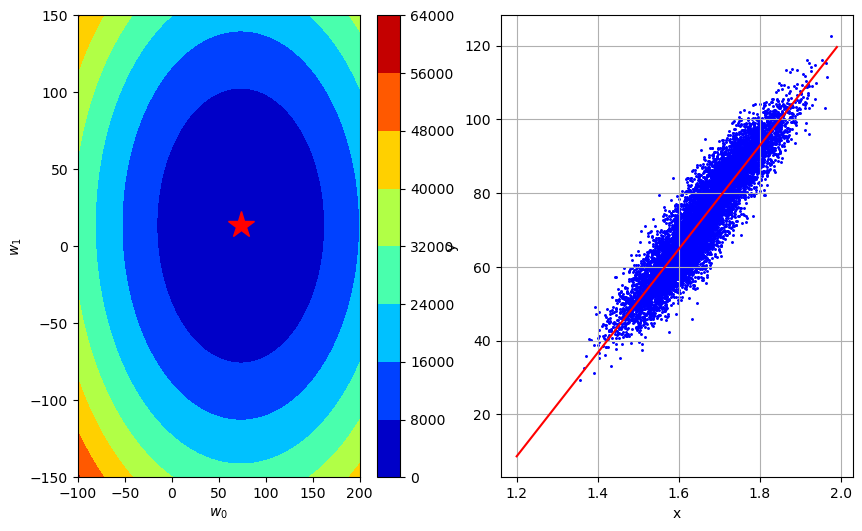

In [42]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=500)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [12]:
import math
math.sqrt(84.84)

9.210863151735564

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [15]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    N = y.shape[0]
    e = y - tx @ w
    grad =  -1 / N * tx.T @ e
    return grad

In [45]:
print(compute_gradient(y, tx, w=np.array([50, 10])))
print(compute_gradient(y, tx, w=np.array([100, 20])))

[-23.293922    -3.47971243]
[26.706078    6.52028757]


Please fill in the functions `gradient_descent` below:

In [49]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        w = w - gamma * grad
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [116]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2125212.8925597533, w0=-892.6706077997894, w1=901.3479712434988
GD iter. 1/49: loss=1721428.2896107903, w0=-796.0741548195998, w1=812.5611453626477
GD iter. 2/49: loss=1394362.7612221295, w0=-709.1373471374293, w1=732.6530020698817
GD iter. 3/49: loss=1129439.6832273148, w0=-630.8942202234758, w1=660.7356731063924
GD iter. 4/49: loss=914851.990051515, w0=-560.4754060009177, w1=596.010077039252
GD iter. 5/49: loss=741035.9585791173, w0=-497.09847320061533, w1=537.7570405788256
GD iter. 6/49: loss=600244.973086475, w0=-440.0592336803432, w1=485.32930776444186
GD iter. 7/49: loss=486204.27483743476, w0=-388.72391811209826, w1=438.1443482314965
GD iter. 8/49: loss=393831.30925571214, w0=-342.5221341006779, w1=395.6778846518457
GD iter. 9/49: loss=319009.20713451685, w0=-300.9405284903995, w1=357.45806743016
GD iter. 10/49: loss=258403.30441634878, w0=-263.517083441149, w1=323.06023193064283
GD iter. 11/49: loss=209312.52321463262, w0=-229.83598289682354, w1=292.10217998

In [117]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [85]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    batches = batch_iter(y, tx, batch_size, num_batches=max_iters, shuffle=True)
    
    for n_iter, (y_batch, tx_batch) in enumerate(batches):
        loss = compute_loss(y, tx, w)
        grad = compute_stoch_gradient(y_batch, tx_batch, w)
        w = w - gamma * grad
        ws.append(w)
        losses.append(loss)
        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [86]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=5658.544448876833, w0=6.472472932569706, w1=-6.18858934860241
SGD iter. 1/49: loss=4964.738597970561, w0=13.060556067697805, w1=-4.6482063154730024
SGD iter. 2/49: loss=4061.9436755760316, w0=18.20167569355962, w1=-5.104287882414923
SGD iter. 3/49: loss=3483.2140439136497, w0=21.511204704303417, w1=-8.072158524239986
SGD iter. 4/49: loss=3252.2987175245294, w0=24.53774413616908, w1=-10.329343427606481
SGD iter. 5/49: loss=3052.850002302021, w0=31.962263553334356, w1=-5.517713145323875
SGD iter. 6/49: loss=2163.413276075111, w0=33.23533510121845, w1=-7.230223452725145
SGD iter. 7/49: loss=2130.3467422013728, w0=36.023924239483435, w1=-8.169059396845839
SGD iter. 8/49: loss=1954.4600744710071, w0=42.823400716686606, w1=0.967547626803201
SGD iter. 9/49: loss=1158.9437599832504, w0=44.40704680963298, w1=-1.7116459023190345
SGD iter. 10/49: loss=1143.431009156698, w0=44.28760968961782, w1=-1.4928587810194967
SGD iter. 11/49: loss=1143.3911279969643, w0=47.63725967867636

In [87]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [138]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [94]:
y.shape, tx.shape

((202,), (202, 2))

In [95]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=5739.670229071705, w0=51.847464098448434, w1=7.724426406192428
GD iter. 1/49: loss=636.5642494031922, w0=67.40170332798299, w1=10.041754328050118
GD iter. 2/49: loss=177.2847112330254, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=135.9495527977104, w0=73.46785662750146, w1=10.945512217574596
GD iter. 4/49: loss=132.22938853853208, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=131.89457375520604, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=131.8644404247067, w0=74.0516072257859, w1=11.03248153448191
GD iter. 7/49: loss=131.86172842496177, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=131.86148434498472, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=131.86146237778675, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=131.86146040073896, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=131.86146022280465, w0=74.06776649225755, w1=11.03488900159354

In [96]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

$MAE(y, w) =  |y - Xw| = e$

$e_i = |y_i - x_i^T w|$

$subgradient MAE(y, w) = g$

$g_i = -x_i^T , \ y_i > x_i^T w$

$g_i = [-x_i^T, x_i^T] , \ y_i = x_i^T w$

$g_i = x_i^T, \ y_i < x_i^Tw$

g = 



In [139]:
height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [155]:
from cmath import sin


def compute_mae_loss(y, tx, w):
    e = y - tx @ w
    mae = np.abs(e).mean()
    return mae

def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    N = y.shape[0]
    e = (y - tx @ w)
    sign = (e >= 0).reshape(-1, 1) * 2 - 1
    grad = -np.ones((1, N)) @ (tx * sign) / N
    return grad.squeeze()
    

In [149]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_mae_loss(y, tx, w)
        subgrad = compute_subgradient_mae(y, tx, w)
        w = w - gamma * subgrad
        
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [150]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=73.29392200210518, w0=0.7, w1=-7.321432349272072e-16
SubGD iter. 1/499: loss=72.59392200210517, w0=1.4, w1=-1.4642864698544144e-15
SubGD iter. 2/499: loss=71.89392200210517, w0=2.0999999999999996, w1=-2.1964297047816213e-15
SubGD iter. 3/499: loss=71.19392200210518, w0=2.8, w1=-2.9285729397088287e-15
SubGD iter. 4/499: loss=70.49392200210517, w0=3.5, w1=-3.660716174636036e-15
SubGD iter. 5/499: loss=69.79392200210518, w0=4.2, w1=-4.3928594095632435e-15
SubGD iter. 6/499: loss=69.09392200210517, w0=4.9, w1=-5.125002644490451e-15
SubGD iter. 7/499: loss=68.39392200210519, w0=5.6000000000000005, w1=-5.857145879417658e-15
SubGD iter. 8/499: loss=67.69392200210518, w0=6.300000000000001, w1=-6.5892891143448656e-15
SubGD iter. 9/499: loss=66.99392200210517, w0=7.000000000000001, w1=-7.321432349272072e-15
SubGD iter. 10/499: loss=66.29392200210518, w0=7.700000000000001, w1=-8.05357558419928e-15
SubGD iter. 11/499: loss=65.59392200210517, w0=8.4, w1=-8.785718819126487e-1

In [151]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [152]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    batches = batch_iter(y, tx, batch_size, num_batches=max_iters, shuffle=True)
    
    for n_iter, (y_batch, tx_batch) in enumerate(batches):
        loss = compute_mae_loss(y, tx, w)
        grad = compute_subgradient_mae(y_batch, tx_batch, w)
        w = w - gamma * grad
        ws.append(w)
        losses.append(loss)
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [153]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=73.29392200210518, w0=0.7, w1=0.2657809537774995
SubSGD iter. 1/499: loss=72.59392200210519, w0=1.4, w1=0.4530513659164956
SubSGD iter. 2/499: loss=71.89392200210516, w0=2.0999999999999996, w1=0.2987594452698628
SubSGD iter. 3/499: loss=71.19392200210518, w0=2.8, w1=0.5093680539996013
SubSGD iter. 4/499: loss=70.49392200210517, w0=3.5, w1=0.0018109248265282263
SubSGD iter. 5/499: loss=69.79392200210518, w0=4.2, w1=-0.2340698146358525
SubSGD iter. 6/499: loss=69.09392200210517, w0=4.9, w1=-0.6928439175025332
SubSGD iter. 7/499: loss=68.39392200210516, w0=5.6000000000000005, w1=-0.29064348742586527
SubSGD iter. 8/499: loss=67.69392200210517, w0=6.300000000000001, w1=-0.721530759691001
SubSGD iter. 9/499: loss=66.99392200210518, w0=7.000000000000001, w1=0.4508208632108752
SubSGD iter. 10/499: loss=66.29392200210518, w0=7.700000000000001, w1=1.6454802358067955
SubSGD iter. 11/499: loss=65.59392200210517, w0=8.4, w1=1.535143339238126
SubSGD iter. 12/499: loss=64.893

In [154]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>